# Kaggle Climate Data Exploration
load and plot Kaggle data

In [4]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set() # Setting seaborn as default style even if use only matplotlib
%matplotlib inline

## Load Kaggle Data

In [41]:
tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
# create new datecolumn and transform to datetime first get a column that says unique data point or summary measure
sum_list = 'Dec?Jan?Feb', 'Mar?Apr?May', 'Jun?Jul?Aug', 'Sep?Oct?Nov', 'Meteorological year'
tmp_df['sum_val'] = tmp_df['Months'].apply(lambda row: row in sum_list)

# get the subset including the month
sub_tmp_df = tmp_df.loc[tmp_df['sum_val'] == False]

# transform to datetime and create a new column
sub_tmp_df['date'] = pd.to_datetime(sub_tmp_df['Months'] + '-' + sub_tmp_df['Year'].astype(str), format = '%B-%Y')

# create a variable season
def map_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
# save variable
sub_tmp_df['season'] = sub_tmp_df['Months'].apply(map_season)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juliu\AppData\Local\Temp\ipykernel_16252\2830062387.py:1: SyntaxWarning: invalid escape sequence '\D'
  tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
C:\Users\juliu\AppData\Local\Temp\ipykernel_16252\2830062387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_tmp_df['date'] = pd.to_datetime(sub_tmp_df['Months'] + '-' + sub_tmp_df['Year'].astype(str), format = '%B-%Y')
C:\Users\juliu\AppData\Local\Temp\ipykernel_16252\2830062387.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description,sum_val,date,season
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data,False,1961-01-01,Winter
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data,False,1962-01-01,Winter
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data,False,1963-01-01,Winter
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data,False,1964-01-01,Winter
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data,False,1965-01-01,Winter
5,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1966,1966,?C,3.629,Fc,Calculated data,False,1966-01-01,Winter
6,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1967,1967,?C,-1.436,Fc,Calculated data,False,1967-01-01,Winter
7,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1968,1968,?C,0.388,Fc,Calculated data,False,1968-01-01,Winter
8,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1969,1969,?C,-2.260,Fc,Calculated data,False,1969-01-01,Winter
9,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1970,1970,?C,0.813,Fc,Calculated data,False,1970-01-01,Winter


## Now let us plot temperature by Time

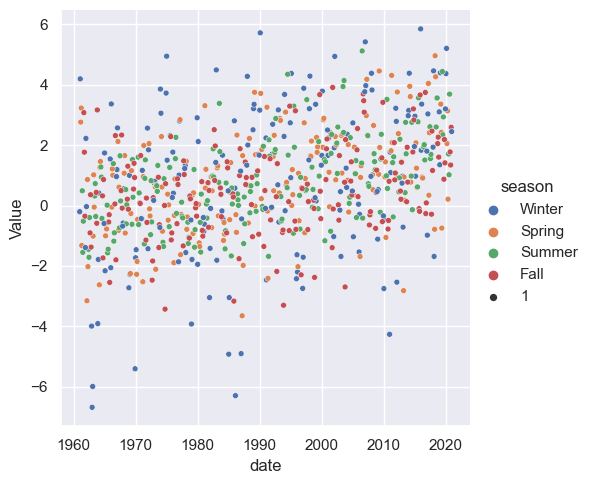

In [47]:
sns.relplot(data = sub_tmp_df.loc[sub_tmp_df['Area'] == 'Germany'], y = "Value", x = "date", hue = "season", size= 1)